In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

In [84]:
# seed 5555 for getting two center
np.random.seed(15555)
center = np.random.randn(4)
center

array([ 0.7155222 , -0.57244961, -1.80962338, -0.05901535])

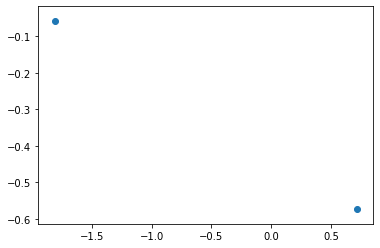

In [85]:
plt.scatter([center[0],center[2]],[center[1],center[3]])
plt.show()

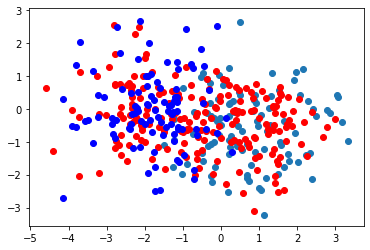

In [86]:
# training seed 3000
# np.random.seed(int(time.time())) testing seed

npx = 100 # number of exmaple
np.random.seed(3000)
pos = np.random.randn(4,npx)
x1 = pos[0]+center[0]
y1 = pos[1]+center[1]
x2 = pos[2]+center[2]
y2 = pos[3]+center[3]

#training set
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
p = np.concatenate((x, y)).reshape(2,npx*2)
r = np.concatenate((np.zeros(npx),np.ones(npx)))

np.random.seed(int(time.time()))
pos_t = np.random.randn(4,npx)
x1_t = pos_t[0]+center[0]
y1_t = pos_t[1]+center[1]
x2_t = pos_t[2]+center[2]
y2_t = pos_t[3]+center[3]

plt.scatter(x1, y1) # training 1
plt.scatter(x2, y2, color='red') # training 2
plt.scatter(x1_t, y1_t, color='red') # testing 1
plt.scatter(x2_t, y2_t, color='blue') # testing 2
plt.show()

#testing set
x_t = np.concatenate((x1_t,x2_t))
y_t = np.concatenate((y1_t,y2_t))
p_t = np.concatenate((x_t, y_t)).reshape(2,npx*2) # combine two set into one array
r_t = np.concatenate((np.zeros(npx),np.ones(npx))) # 0 x npx  1 x npx

In [73]:
"""
Apply the gradient descent algorithm
Plot the training loss at every iteration
Plot the testing loss at every iteration
Plot the training accuracy at every iteration
Plot the testing accuracy at every iteration
"""
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    s = 1 / ( 1 + np.exp(-1*z))
    
    return s

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros((dim, 1))
    b = 0.

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (2, 1)
    b -- bias, a scalar
    X -- data of size (2, number of examples * 2)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples * 2)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)                                   # compute activation
    cost = -1/m * np.sum(Y*np.log(A) + (1-Y)*np.log(1-A))                                 # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = 1/m * np.dot(X, (A-Y).T)
    db = 1/m * np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

# GRADED FUNCTION: predict

def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X)+b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0, i] > 0.5 :
            Y_prediction[0,i] = 1.
        else :
            Y_prediction[0, i] = 0.
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction



# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, X_test, num_iterations, learning_rate, print_cost = False):
    costs = []
    costs_test = []
    accuracy_train = []
    accuracy_test = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, X, Y)
        grads2, cost_test = propagate(w, b, X_test, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule 
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        Y_prediction_test = predict(w, b, X_test)
        Y_prediction_train = predict(w, b, X)
        
        # Record the costs
        accuracy_train.append(100 - np.mean(np.abs(Y_prediction_train - Y)) * 100)
        accuracy_test.append(100 - np.mean(np.abs(Y_prediction_test - Y)) * 100)
        costs.append(cost)
        costs_test.append(cost_test)
        
        
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs,costs_test, accuracy_train,accuracy_test



# GRADED FUNCTION: model
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    
    # initialize parameters with zeros (
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent 
    parameters, grads, costs, costs_test, accuracy_train,accuracy_test = optimize(w, b, X_train, Y_train,X_test, num_iterations, learning_rate, print_cost = False)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    

    
    d = {"costs": costs,
         "costs_test": costs_test,
         "Y_prediction_test": accuracy_test, 
         "Y_prediction_train" : accuracy_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [87]:
d = model(p, r, p_t, r_t, num_iterations = 100, learning_rate = 0.005, print_cost = True)

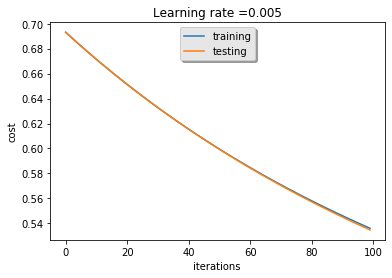

In [88]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
costs_test = np.squeeze(d['costs_test'])
plt.plot(costs, label= 'training')
plt.plot(costs_test, label= 'testing')
plt.ylabel('cost')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(d["learning_rate"]))
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

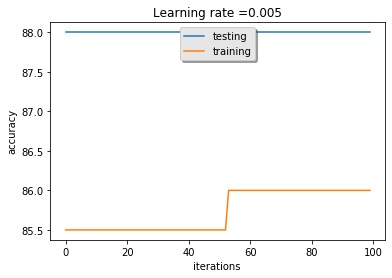

In [89]:
accuracy_test = np.squeeze(d['Y_prediction_test'])
accuracy_train = np.squeeze(d['Y_prediction_train'])
plt.plot(accuracy_test, label= 'testing')
plt.plot(accuracy_train, label= 'training')
plt.ylabel('accuracy')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(d["learning_rate"]))
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [90]:
d = model(p, r, p_t, r_t, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

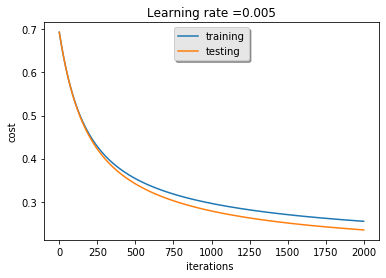

In [91]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
costs_test = np.squeeze(d['costs_test'])
plt.plot(costs, label= 'training')
plt.plot(costs_test, label= 'testing')
plt.ylabel('cost')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(d["learning_rate"]))
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

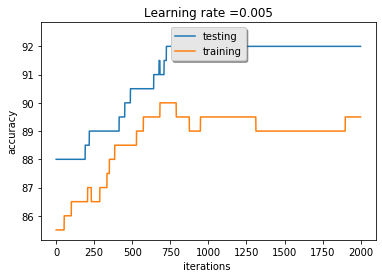

In [92]:
accuracy_test = np.squeeze(d['Y_prediction_test'])
accuracy_train = np.squeeze(d['Y_prediction_train'])
plt.plot(accuracy_test, label= 'testing')
plt.plot(accuracy_train, label= 'training')
plt.ylabel('accuracy')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(d["learning_rate"]))
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [93]:
d = model(p, r, p_t, r_t, num_iterations = 4000, learning_rate = 0.005, print_cost = True)

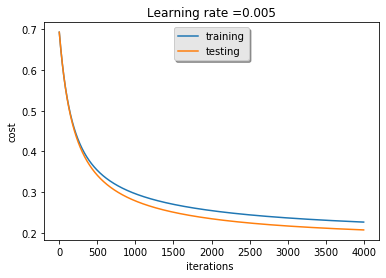

In [94]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
costs_test = np.squeeze(d['costs_test'])
plt.plot(costs, label= 'training')
plt.plot(costs_test, label= 'testing')
plt.ylabel('cost')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(d["learning_rate"]))
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

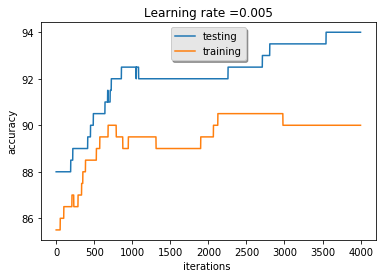

In [95]:
accuracy_test = np.squeeze(d['Y_prediction_test'])
accuracy_train = np.squeeze(d['Y_prediction_train'])
plt.plot(accuracy_test, label= 'testing')
plt.plot(accuracy_train, label= 'training')
plt.ylabel('accuracy')
plt.xlabel('iterations ')
plt.title("Learning rate =" + str(d["learning_rate"]))
legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()